# Multiclass with 1 hidden layer

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

## Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import os
import sys
sys.path.insert(0, r'G:\My Drive\DNN')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
# from utils.helper import fn_plot_decision_boundary # this function is from helper.py

In [3]:
# print (fn_plot_decision_boundary.__doc__)

## Setup Global Parameters

In [4]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.33

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [5]:
iris = datasets.load_iris()

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [10]:
# X, y = datasets.load_iris(n_samples=N_SAMPLES, 
#                            shuffle=True, 
#                            noise=NOISE, 
#                            random_state=RANDOM_STATE)

X, y = datasets.load_iris(return_X_y=True)
print(X[:5], y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [0 0 0 0 0]


## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [11]:
data_df = datasets.load_iris(as_frame=True).data

data_df['target'] = y

data_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
107,7.3,2.9,6.3,1.8,2
114,5.8,2.8,5.1,2.4,2
57,4.9,2.4,3.3,1.0,1
59,5.2,2.7,3.9,1.4,1
105,7.6,3.0,6.6,2.1,2


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
data_df.describe() # Generate descriptive statistic

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# what labels are present?
data_df.target.unique()

array([0, 1, 2])

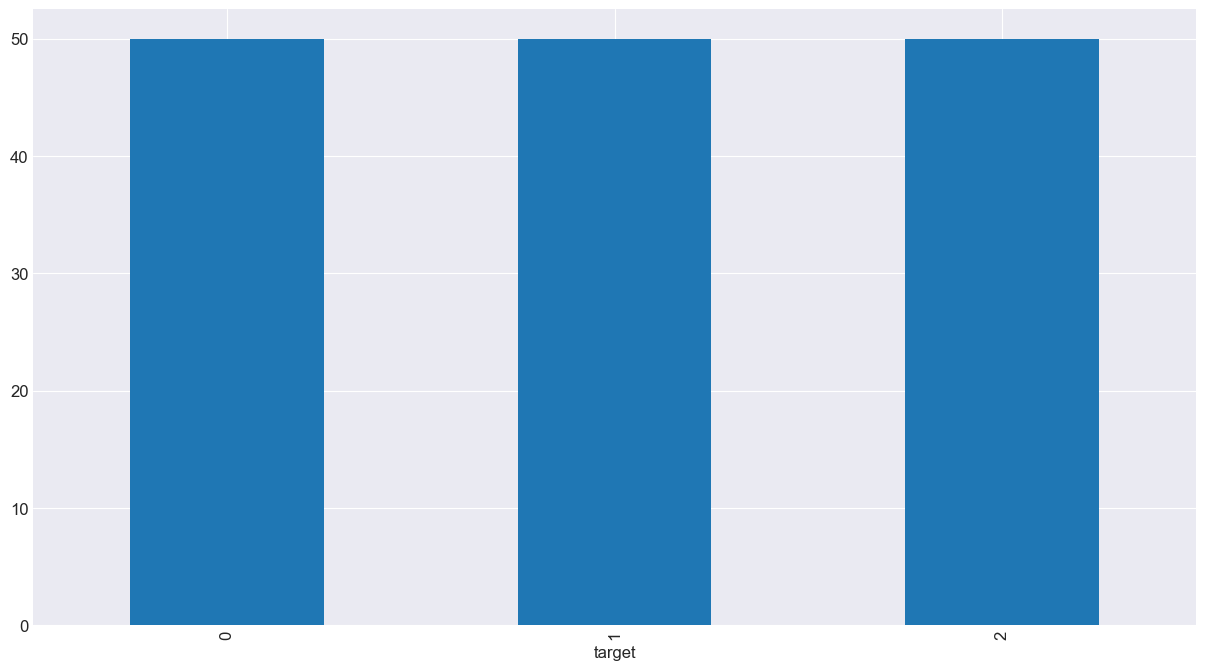

In [15]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

In [16]:
# # Using Seaborn
# ax = sns.scatterplot(data=data_df, # data from dataframe
#                      x='A', y='B',  # X axis and y axis columns
#                      palette=sns.color_palette("bright", 2), # color map
#                      hue='target'); # Color as per target column

In [17]:
# data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [18]:
# data_train.shape, data_test.shape

In [19]:
# rng.random(data_train.shape[1])

In [20]:
def fn_softmax(z):
    '''
    Args:
        z : a matrix of z values of shape (m, n_output)
    returns:
        softmax values of z
    '''
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims= True) # keepdims = True avoids the python broadcasting which will results the size of m*n_outputs

In [21]:
t = fn_softmax(np.asarray([[8, 5, 0], [-10, 0, 10]]))
t.sum(axis=1).shape

(2,)

In [22]:
def fn_activ(x):

    return np.tanh(x)

def fn_activ_prime(x):

    return 1.0 - np.tanh(x)**2

In [23]:
def predict(model, X_p):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    ### Forward Propagation

    # Layer 1
    z1 = X_p.dot(W1) + b1 # Aggregation
    a1 = fn_activ(z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation
    a2 = fn_softmax(z2) # Activation
    
    return np.argmax(a2, axis=1) # pick index of class with highest probability

In [24]:
def calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    m = X_l.shape[0]

    # Layer 1
    z1 = X_l.dot(W1) + b1 # Aggregation
    a1 = fn_activ(z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation
    a2 = fn_softmax(z2) # Activation
    
    data_loss = -(y_l*np.log(a2) + 
                  (1 - y_l) * np.log(1 - a2)).sum() # Binary

    return data_loss/m 

In [25]:
loss_hist = {}

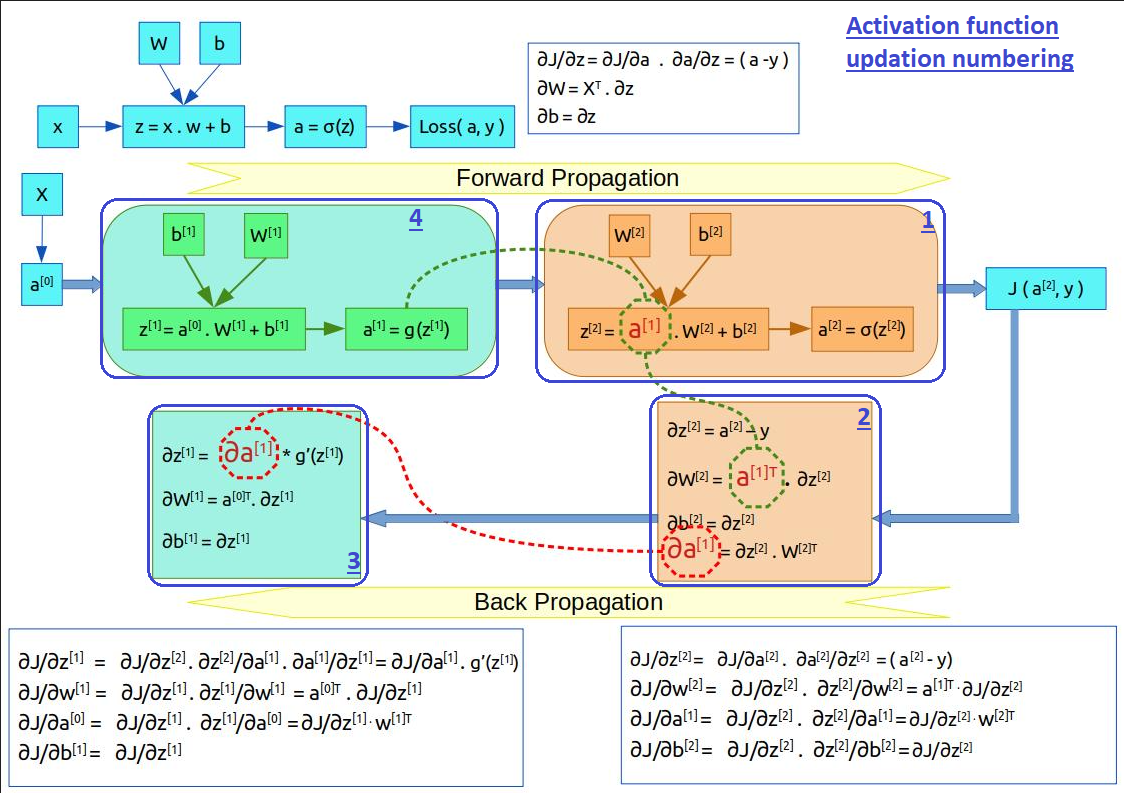

In [26]:
def build_model(X_tr, y_tr, nn_hdim, nn_out, alpha=ALPHA ,epochs = EPOCHS):
    '''
    Args:
        X_tr : Training features
        y_tr : Training labels
        nn_hdim : Number of nodes in the hidden layer
        nn_out : Size of output
    '''
    m, nn_input_dim = X_tr.shape # no. of rows, no. of inputs
    nn_output_dim = nn_out
    
    # W1 = rng.random((nn_input_dim, nn_hdim), 
    #          dtype = np.float32) / np.sqrt(nn_input_dim)

    # W2 = rng.random((nn_hdim, nn_output_dim), 
    #         dtype = np.float32) / np.sqrt(nn_hdim)

    # size = 2,4
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    # size = 4,2
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    # size = 4
    b1 = np.zeros((1, nn_hdim), dtype= np.float32)
    # size = 2
    b2 = np.zeros((1, nn_output_dim), dtype= np.float32)

    curr_loss = 0
    loss, epoch = [], []

    for i in range(0, epochs):
        ### Forward Propagation

        # Layer 1
        # marked 3
        z1 = X_tr.dot(W1) + b1 # Aggregation
        a1 = fn_activ(z1) # Activation 

        # Layer 2 
        # marked 1
        z2 = a1.dot(W2) + b2 # Aggregation
        a2 = fn_softmax(z2) # Activation 
    
        ### Back Propagation 

        # marked 2
        assert (a2.shape == y_tr.shape), f'check y {a2.shape}/{y_tr.shape}'
        dz2 = a2 - y_tr ## REMEMBER dim of a2 and y to be same

        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis= 0 , keepdims = True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'

        # Layer1
        # marked 4
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check z1 {z1.shape}/{dz1.shape}'
    
        dW1 = (X_tr.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis= 0 , keepdims = True)
        assert(b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'


        # Gradient Update
        W1 += -alpha * dW1/m
        b1 += -alpha * db1/m
        W2 += -alpha * dW2/m
        b2 += -alpha * db2/m

        model = {'W1': W1, 'b1' : b1,
                 'W2': W2, 'b2' : b2
                 }
    
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)
        if i%100 == 0:
            print(f'After epoch: {i:3d}; loss: {curr_loss: .5f}')

    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

    return model

In [27]:
y.shape

(150,)

In [28]:
# y = pd.get_dummies(y).to_numpy()

In [29]:
# y.shape

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE,
                                                    )

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [33]:
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)

y_test = lb.transform(y_test)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100, 3), (50, 3))

In [35]:
nn_out_dim = 3

model = build_model(X_train, y_train, 4, nn_out_dim)

After epoch:   0; loss:  1.83689
After epoch: 100; loss:  0.64704
After epoch: 200; loss:  0.39154
After epoch: 300; loss:  0.25661
After epoch: 400; loss:  0.19777
After epoch: 500; loss:  0.16761
After epoch: 600; loss:  0.14968
After epoch: 700; loss:  0.13788
After epoch: 800; loss:  0.12956
After epoch: 900; loss:  0.12342
After epoch: 1000; loss:  0.11871
After epoch: 1100; loss:  0.11502
After epoch: 1200; loss:  0.11207
After epoch: 1300; loss:  0.10966
After epoch: 1400; loss:  0.10768
After epoch: 1500; loss:  0.10602
After epoch: 1600; loss:  0.10463
After epoch: 1700; loss:  0.10344
After epoch: 1800; loss:  0.10243
After epoch: 1900; loss:  0.10156
After epoch: 2000; loss:  0.10080
After epoch: 2100; loss:  0.10014
After epoch: 2200; loss:  0.09956
After epoch: 2300; loss:  0.09905
After epoch: 2400; loss:  0.09860
After epoch: 2500; loss:  0.09820
After epoch: 2600; loss:  0.09784
After epoch: 2700; loss:  0.09752
After epoch: 2800; loss:  0.09723
After epoch: 2900; loss:

In [49]:
model

{'W1': array([[-0.12272765,  0.41636284, -0.13738208,  0.5874788 ],
        [-0.39489609, -1.07841211, -0.2920411 , -0.63312261],
        [ 2.05632608,  0.6934572 ,  1.61329799,  1.1212302 ],
        [ 1.09428526,  0.44005721,  1.50172087,  0.95170811]]),
 'b1': array([[-1.6609672 ,  0.23352818, -2.2625778 ,  1.0290785 ]],
       dtype=float32),
 'W2': array([[-1.23709429, -1.18176554,  3.08539386],
        [-1.99693254,  1.17132263,  1.89389231],
        [-0.75266523, -1.76190338,  3.37671047],
        [-2.68785832,  2.39814978,  0.99001631]]),
 'b2': array([[ 0.21509679,  0.02558008, -0.24067761]], dtype=float32)}

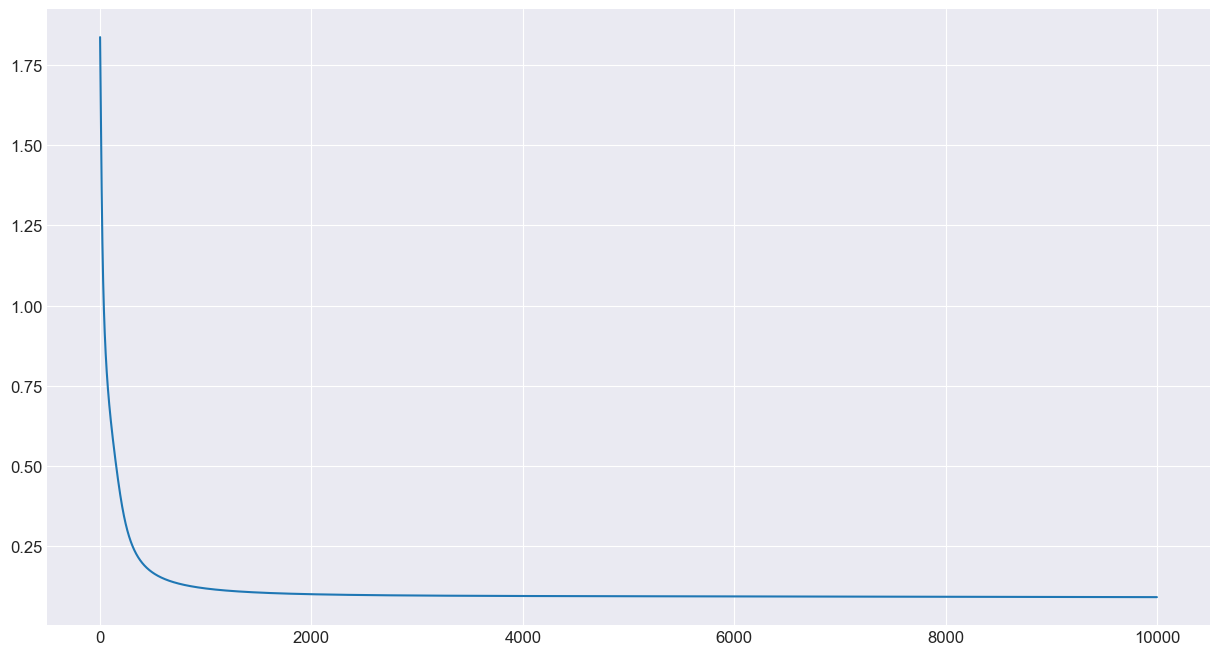

In [36]:
plt.plot(loss_hist['epoch'], loss_hist['loss'])

In [37]:
model

{'W1': array([[-0.12272765,  0.41636284, -0.13738208,  0.5874788 ],
        [-0.39489609, -1.07841211, -0.2920411 , -0.63312261],
        [ 2.05632608,  0.6934572 ,  1.61329799,  1.1212302 ],
        [ 1.09428526,  0.44005721,  1.50172087,  0.95170811]]),
 'b1': array([[-1.6609672 ,  0.23352818, -2.2625778 ,  1.0290785 ]],
       dtype=float32),
 'W2': array([[-1.23709429, -1.18176554,  3.08539386],
        [-1.99693254,  1.17132263,  1.89389231],
        [-0.75266523, -1.76190338,  3.37671047],
        [-2.68785832,  2.39814978,  0.99001631]]),
 'b2': array([[ 0.21509679,  0.02558008, -0.24067761]], dtype=float32)}

In [47]:
y_pred = predict(model, X_train)

accuracy_score(np.argmax(y_train, axis =1), y_pred)


0.98

Testing Accuracy

In [48]:
y_pred = predict(model, X_test)

accuracy_score(np.argmax(y_test, axis =1), y_pred)


1.0

In [40]:
cm = confusion_matrix(np.argmax(y_test, axis =1), y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 17]], dtype=int64)

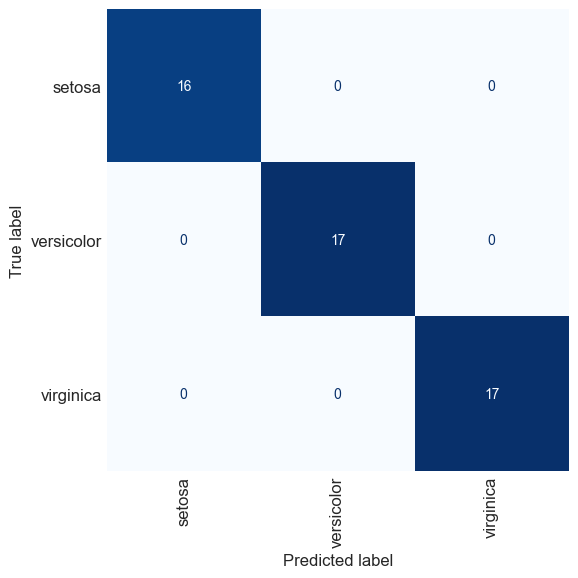

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    
fig, ax = plt.subplots(figsize = (6,6))

disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
# Disable the grid
ax.grid(False)

plt.show();

ValueError: shapes (906510,2) and (4,4) not aligned: 2 (dim 1) != 4 (dim 0)

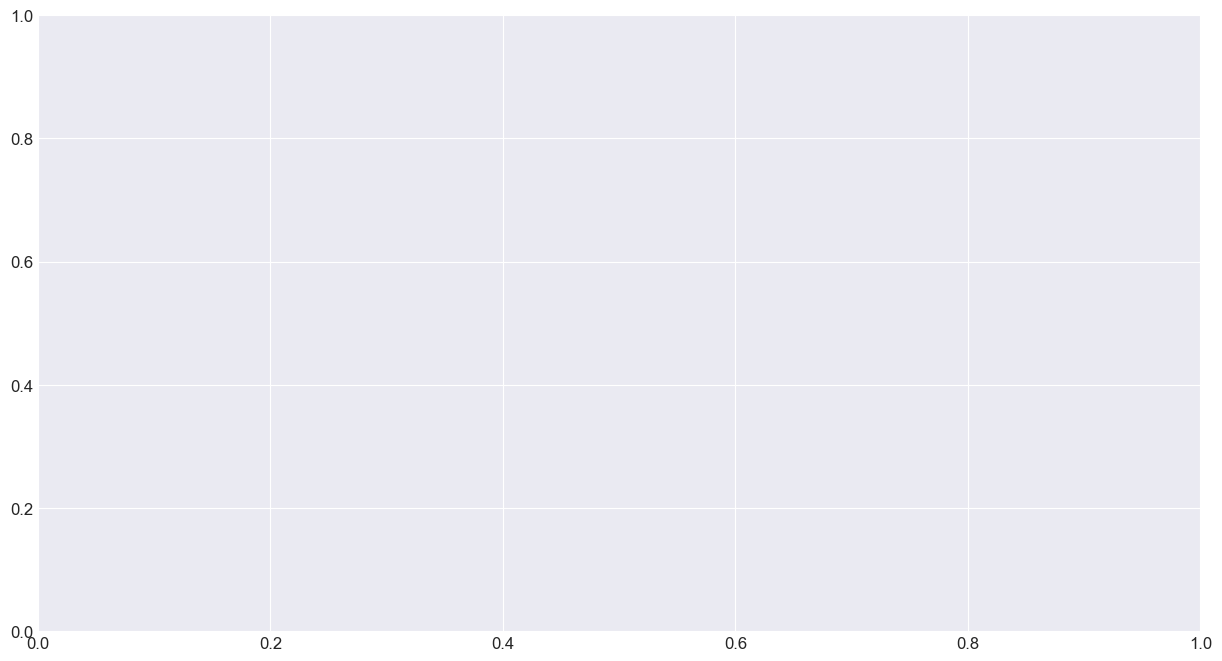

In [42]:
X = X_train

fig, ax = plt.subplots()
dm = 0.005 # Smoothen the curve

X_min, X_max = X[:,0].min() - 0.05, X[:,0].max() + 0.05
y_min, y_max = X[:,1].min() - 0.05, X[:,1].max() + 0.05

xx, yy = np.meshgrid(np.arange(X_min, X_max, dm),
                     np.arange(y_min, y_max, dm))

XX = np.c_[xx.ravel(), yy.ravel()]
# XX = np.hstack((XX, np.ones((XX.shape[0],1))))

y_pred = predict(model, XX)

# for row in XX:
#     pred = predict(row, model)
#     y_pred.append(np.round(pred)) # to get only 2 sections in the contour, we used np.round(pred)

Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c = y_train.argmax(axis=1),edgecolors='k', cmap=plt.cm.bwr, marker='o');

In [ ]:
xx.shape, yy.shape

((534, 780), (534, 780))